# Machine learning to predict molecule properties : solubility



The solubility of molecules is an important property in many applications like for drug selection or for compound selection for battery designes (no link to health).

Being able to predict the solubility of a molecule from its formula instead of having to make measuring experiment in an important aspect to enhanced fatester molecule discovery.

In this notebook we will do basic solubility prediction with machine learning models and rdkit


Install the python rdkit package with pip or conda

cf https://www.rdkit.org/docs/index.html

# Molecule representations with Rdkit

Rdkit is a package allowing to work with molecule data and their representation. 

For basic manipulations, the main submodule is **Chem**



### Smile representation

Smile lets represent molecules with text strings




The following string contains the SMILE representation of the paracetamol molecule

In [55]:
smile = 'CC(=O)NC1=CC=C(O)C=C1'

import rdkit and the Chem submodule

In [56]:
import rdkit as rd
from rdkit import Chem

Using the MolFromSmiles function, create a molecule from the smile representation and print its types

In [57]:
paracetamol = Chem.MolFromSmiles(smile)

With the MolToImage function of the Draw package, display the molecule

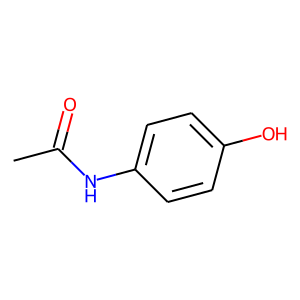

In [58]:
Chem.Draw.MolToImage(paracetamol)

You can get the Number of atoms of the molecules and the list of atoms with the methods GetNumAtoms and getAtoms.

Print the number of atoms of the molecule

In [59]:
print("Atomes numbers:",paracetamol.GetNumAtoms())

Atomes numbers: 11


If you compare to the picture, you may see that the number of atoms is not 11. What is the total number and why rdkit do not give the same answer ?

Print the list of each atoms

In [60]:
for atom in paracetamol.GetAtoms():
    print(atom.GetSymbol(), end=" ")

C C O N C C C C O C C 

Store the number of bonds of the molecule in **n_bond** (look which method can be used for that) and print

In [61]:
n_bonds = paracetamol.GetBonds()
for bond in n_bonds:
    print(bond.GetBeginAtom().GetSymbol(), end="-")
    print(bond.GetEndAtom().GetSymbol())

C-C
C-O
C-N
N-C
C-C
C-C
C-C
C-O
C-C
C-C
C-C


For each bond, print if the bond is single or double

In [62]:
for bond in n_bonds:
    print(bond.GetBeginAtom().GetSymbol(), end="-")
    print(bond.GetEndAtom().GetSymbol(), end="=")
    print(bond.GetBondType())

C-C=SINGLE
C-O=DOUBLE
C-N=SINGLE
N-C=SINGLE
C-C=AROMATIC
C-C=AROMATIC
C-C=AROMATIC
C-O=SINGLE
C-C=AROMATIC
C-C=AROMATIC
C-C=AROMATIC


### Reading molecule data from file

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at 
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf". 


Download this file and save it in a folder. 




Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier" and store the result in a variable named **morphine**



In [31]:
morphine = Chem.SDMolSupplier('DB00295.sdf')

Display its type

In [39]:
type(morphine)

rdkit.Chem.rdmolfiles.SDMolSupplier

Display the picture of the molecule


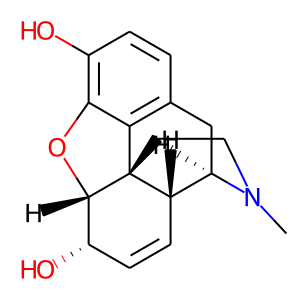

In [33]:
Chem.Draw.MolToImage(morphine[0])

Display the number of atoms and the number of bonds

In [36]:
print("Number of atoms:",morphine[0].GetNumAtoms())
print("Number of bonds:", len(morphine[0].GetBonds()))

Number of atoms: 21
Number of bonds: 25


### Descriptors 


Molecules are also described by a set of physiochemical descriptors like 
- the log partition coefficient,
- the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.

The rdkit.ML.Descriptors module and its sub module let us compute molecule descriptors.

the rdkit.ML.Descriptors module has an attribute name \_descList, display it

In [40]:
from rdkit.Chem import Descriptors

In [43]:
for desc in Descriptors._descList:
    print(desc[0])

MaxEStateIndex
MinEStateIndex
MaxAbsEStateIndex
MinAbsEStateIndex
qed
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA5
EState_VSA6
EState_VSA7
EState

Compute all descriptors in the _descList list of the paracetamol molecule using the MoleculeDescriptors.MolecularDescriptorCalculator class

In [44]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

In [51]:
calculator = MolecularDescriptorCalculator(x[0] for x in Descriptors._descList)
calc_all_descriptors = calculator.CalcDescriptors(m)

Display the names and the fvalues of the descriptors

In [53]:
for i in range(len(Descriptors._descList)):
    print(Descriptors._descList[i][0], end=": ")
    print(calc_all_descriptors[i])

MaxEStateIndex: 10.524468537414966
MinEStateIndex: -0.11510204081632636
MaxAbsEStateIndex: 10.524468537414966
MinAbsEStateIndex: 0.11510204081632636
qed: 0.5950261967780849
MolWt: 151.165
HeavyAtomMolWt: 142.093
ExactMolWt: 151.063328528
NumValenceElectrons: 58
NumRadicalElectrons: 0
MaxPartialCharge: 0.22074743631242583
MinPartialCharge: -0.5079643157925783
MaxAbsPartialCharge: 0.5079643157925783
MinAbsPartialCharge: 0.22074743631242583
FpDensityMorgan1: 1.3636363636363635
FpDensityMorgan2: 1.9090909090909092
FpDensityMorgan3: 2.3636363636363638
BCUT2D_MWHI: 16.25468871437965
BCUT2D_MWLOW: 10.280190859964755
BCUT2D_CHGHI: 1.9280360590359866
BCUT2D_CHGLO: -1.9945540738765895
BCUT2D_LOGPHI: 2.12524757916018
BCUT2D_LOGPLOW: -2.04401131261029
BCUT2D_MRHI: 5.88095478459792
BCUT2D_MRLOW: -0.11373578338266109
BalabanJ: 2.7362980721056545
BertzCT: 253.29949758389105
Chi0: 8.267584713501616
Chi0n: 6.164862962722325
Chi0v: 6.164862962722325
Chi1: 5.1815405503520555
Chi1n: 3.2490981480278296
Chi

### Fingerprinting


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.





With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector. 

In [91]:
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

paracetamol_fingerprint = GetMorganFingerprintAsBitVect(paracetamol, 2)

Display its type

In [92]:
type(paracetamol_fingerprint)

rdkit.DataStructs.cDataStructs.ExplicitBitVect

With the DataStructs module convert it to a numpy vector and display it shape and display it

In [93]:
import numpy as np

In [94]:
paracetamol_np_vector = np.array(paracetamol_fingerprint)
print(paracetamol_np_vector.shape)
print(paracetamol_np_vector)

(2048,)
[0 0 0 ... 0 0 0]


Create a function smiles_to_np_morganfingerprinting which takes a smile representation and gives back the numpy version of the morgan finger_printing

In [95]:
def smiles_to_np_morganfingerprinting(smile):
    m = Chem.MolFromSmiles(smile)
    fp = GetMorganFingerprintAsBitVect(m, 2)
    np_ver = np.array(fp)
    return np_ver

Compute the morgan finger printing of the aspirin (CC(=O)OC1=CC=CC=C1C(O)=O) and paracetamol (CC(=O)NC1=CC=C(O)C=C1)

In [96]:
aspirin = "CC(=O)OC1=CC=CC=C1C(O)=O"
aspirin_morgan_fp = smiles_to_np_morganfingerprinting(aspirin)
aspirin_morgan_fp

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
# Paracetamol has been done just above

Compute the DiceSimilarity of the two molecules

### SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.



Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).




Highlight the pattern "CCC" in these molecules.




Do the same thing ex 1 but for the pattern "C(=O)N".